# This notebook compares the results from Thermobar to those calculated using the spreadsheet hosted on Keith Putirka's personal website
(http://www.fresnostate.edu/csm/ees/faculty-staff/putirka.html)

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
#import PT_Thermobar_V1 as pw
import Thermobar as pt
pd.options.display.max_columns = None

In [2]:
out=pt.import_excel('Python_Liq_CpxBarometers_Test.xlsx', sheet_name="SomeFe3+")
my_input=out['my_input']
myCPXs1=out['Cpxs']
myLiquids1=out['Liqs']

## Equation 32a Putirka 2008

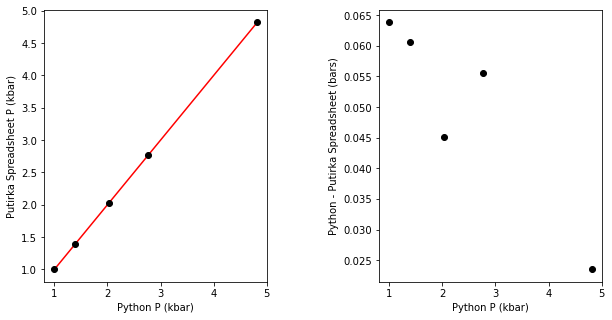

In [3]:
FixedT_Put2008_eq32a =pt.calculate_cpx_only_press(cpx_comps=myCPXs1, equationP="P_Put2008_eq32a", T=1400)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedT_P_Put2008_eq32a']), np.max(my_input['FixedT_P_Put2008_eq32a'])), (np.min(my_input['FixedT_P_Put2008_eq32a']), np.max(my_input['FixedT_P_Put2008_eq32a'])), '-r')
ax1.plot(FixedT_Put2008_eq32a, my_input['FixedT_P_Put2008_eq32a'], 'ok')
ax2.plot(FixedT_Put2008_eq32a, 1000*(FixedT_Put2008_eq32a-my_input['FixedT_P_Put2008_eq32a']), 'ok')
ax1.set_xlabel('Python P (kbar)')
ax1.set_ylabel('Putirka Spreadsheet P (kbar)')
ax2.set_xlabel('Python P (kbar)')
ax2.set_ylabel('Python - Putirka Spreadsheet (bars)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

# Equation 32b Putirka 2008
- Slightly strange, as requires users to enter a water content (so requires some guess of the liquid). 
- If nothing is entered, it performs calculations for H2O=0
- If users enter "fixed" it takes H2O_Liq from the cpx array so 1st users should append H2O onto this array as below
- Users can also enter a constant value like H2O_Liq=4

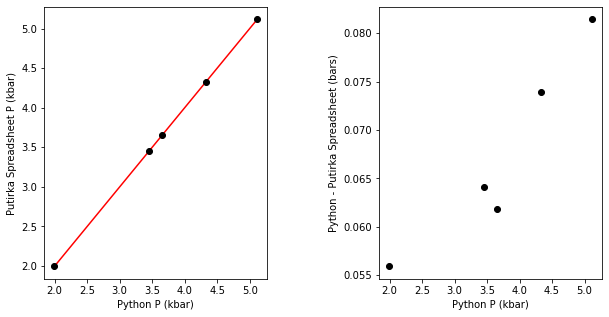

In [5]:
myCPXs1['H2O_Liq']=myLiquids1['H2O_Liq']
myCPXs1['T_K']=my_input['T_K']
FixedT_Put2008_eq32b =pt.calculate_cpx_only_press(cpx_comps=myCPXs1, equationP="P_Put2008_eq32b", T=1400, H2O_Liq=myLiquids1['H2O_Liq'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedT_P_Put2008_eq32b']), np.max(my_input['FixedT_P_Put2008_eq32b'])), (np.min(my_input['FixedT_P_Put2008_eq32b']), np.max(my_input['FixedT_P_Put2008_eq32b'])), '-r')
ax1.plot(FixedT_Put2008_eq32b, my_input['FixedT_P_Put2008_eq32b'], 'ok')
ax2.plot(FixedT_Put2008_eq32b, 1000*(FixedT_Put2008_eq32b-my_input['FixedT_P_Put2008_eq32b']), 'ok')
ax1.set_xlabel('Python P (kbar)')
ax1.set_ylabel('Putirka Spreadsheet P (kbar)')
ax2.set_xlabel('Python P (kbar)')
ax2.set_ylabel('Python - Putirka Spreadsheet (bars)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

# Cpx-only temperature

## Equation 32d Putirka

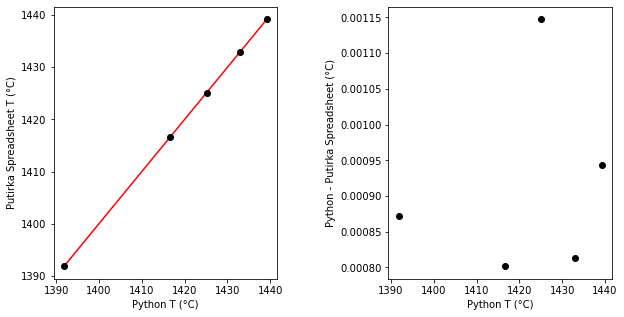

In [6]:
P_dep_Put2008_eq32d=pt.calculate_cpx_only_temp(cpx_comps=myCPXs1, equationT="T_Put2008_eq32d", P=my_input['P_kbar'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedP_P_Putirka_eq32d']), np.max(my_input['FixedP_P_Putirka_eq32d'])), (np.min(my_input['FixedP_P_Putirka_eq32d']), np.max(my_input['FixedP_P_Putirka_eq32d'])), '-r')
ax1.plot(P_dep_Put2008_eq32d, my_input['FixedP_P_Putirka_eq32d'], 'ok')
ax2.plot(P_dep_Put2008_eq32d, P_dep_Put2008_eq32d-my_input['FixedP_P_Putirka_eq32d'], 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python - Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)